In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

In [2]:
path = "/Users/tristangarcia/desktop/Network Traffic Classification/data/"
train = pd.read_pickle(f"{path}train.pkl")

In [3]:
print(train.describe())

                 dur        sbytes        dbytes           sttl  \
count  308030.000000  3.080300e+05  3.080300e+05  308030.000000   
mean        0.585675  3.972205e+03  2.709072e+04      82.468662   
std         3.717532  7.394679e+04  1.384768e+05      88.450181   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000009  1.460000e+02  0.000000e+00      31.000000   
50%         0.004539  5.340000e+02  3.040000e+02      31.000000   
75%         0.089222  2.646000e+03  1.016800e+04      60.000000   
max        59.999989  1.106347e+07  1.283855e+07     255.000000   

                dttl          sloss          dloss         sload  \
count  308030.000000  308030.000000  308030.000000  3.080300e+05   
mean       29.437178       4.228419      12.300107  6.696991e+07   
std        51.060960      28.645770      48.964742  1.532635e+08   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  3.05

# Utility functions

In [4]:
def multi_corr(col1, col2="label", df=train):
    '''
    Returns
    - correlation between two variables
    - correlation between log1p of a feature and another feature
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print(f"Correlation : {corr}\nlog_Correlation: {low_corr}")

# Correlation

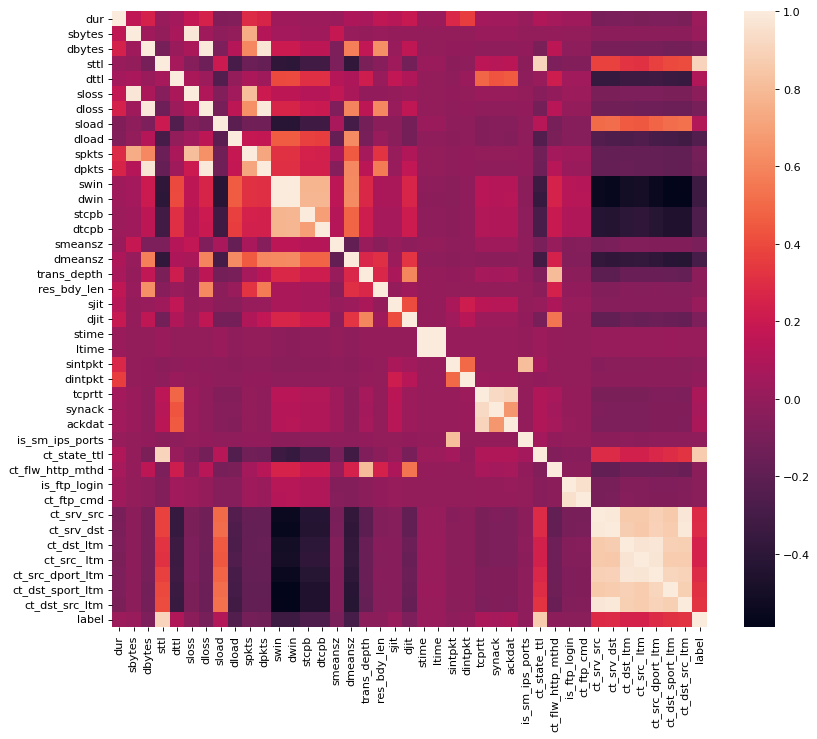

In [5]:
# Dropping non-numeric columns for this example
train_numeric = train.select_dtypes(include=[np.number])
train_numeric
# Feature Correlation
plt.figure(figsize=(12, 10), dpi=80)
feat_corr = train_numeric.corr(method='pearson')
corr_plot = sns.heatmap(feat_corr)
plt.show()

In [6]:
# Getting and printing high correlated features
limit = 0.9

columns = feat_corr.columns
for i in range(feat_corr.shape[0]):
    for j in range(i+1, feat_corr.shape[0]):
        if feat_corr.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {feat_corr.iloc[i, j]}")

sbytes               sloss                0.9785615067510632
dbytes               dloss                0.9913197284772675
dbytes               dpkts                0.9690759302666315
sttl                 ct_state_ttl         0.9019182675054074
sttl                 label                0.9066067638184897
dloss                dpkts                0.9902869189211851
swin                 dwin                 0.995487787456939
stime                ltime                0.9999994476767606
tcprtt               synack               0.9224710070831222
tcprtt               ackdat               0.900924621232999
is_ftp_login         ct_ftp_cmd           0.9513107965608493
ct_srv_src           ct_srv_dst           0.9826242901131962
ct_srv_src           ct_dst_src_ltm       0.9800592209429959
ct_srv_dst           ct_dst_src_ltm       0.9830916110395751
ct_dst_ltm           ct_src_ ltm          0.9654992181564878
ct_dst_ltm           ct_src_dport_ltm     0.9793102777109469
ct_src_ ltm          ct_sr

## Most correlated feature

- sbyte, sloss
- dbyts, dloss, dpkts
- sttl, ct_state_ttl, label
- dloss, dpkts
- swin, dwin
- stime, ltime
- tcprtt, synack, ackdat
- ct_srv_src, ct_srv_dst, ct_dst_src_ltm
- ct_dst_ltm, ct_src_ ltm, ct_src_dport_ltm, ct_dst_sport_ltm

# Countplots, PDF and CDF for features

In [7]:
#Function to plot count plot of categorical features in our data
def plot_count_plot(column,title,figsize=(6,5)):
    '''
    - Takes a column as input and produces a count plot 
    - To be used for categorical variables
    '''
    plt.figure(figsize=figsize)
    sns.set_theme(style='darkgrid')
    ax = sns.countplot(x=column)
    plt.title(title)
    plt.show()
    
    for cat in column.unique():
        count = len(train[column == cat])
        print(f"{count} observations of {cat} ({round(count / len(column),2)}%)")
    

#Function to plot the pdf and cdf of the numeric features in our dataset    
def plot_histograms(column):
    '''
    - Takes a column as input and produces two histograms:
      1. Histogram of the original data.
      2. Histogram of the log1p-transformed data (log(1 + value) of the data).
    '''
    plt.figure(figsize=(12,6))
    
    # Histogram of the original data
    plt.subplot(1, 2, 1)
    sns.histplot(column, kde=True)
    plt.title('Histogram of ' + column.name)
    
    # Histogram of the log1p-transformed data
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(column), kde=True)
    plt.title('Histogram of log1p(' + column.name + ')')
    plt.show()

## Target Variables

In [8]:
# Find the number and ratio of normal and attack traffic
normal_count = len(train[train["label"] == 0])
attack_count = len(train[train["label"] == 1])

print(f"{normal_count} normal traffic ({round(normal_count / len(train['label']),2)}%)")
print(f"{attack_count} attack traffic ({round(attack_count / len(train['label']),2)}%)")

245804 normal traffic (0.8%)
62226 attack traffic (0.2%)


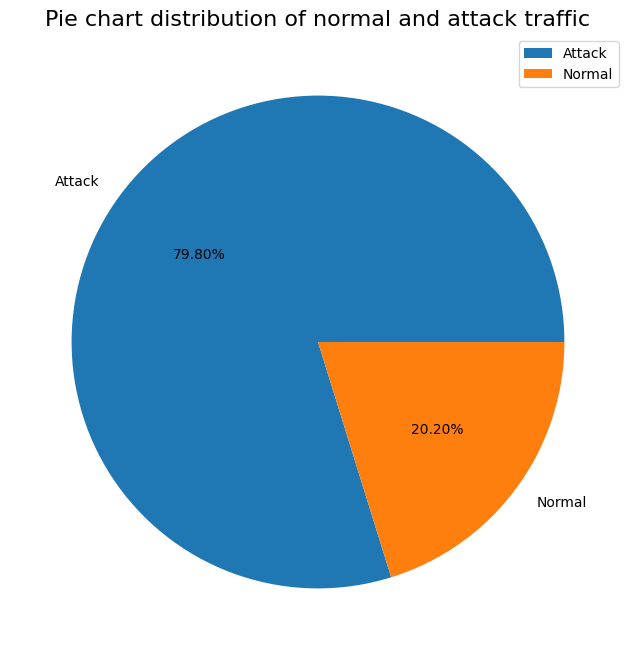

In [9]:
# Creating a pie chart for normal vs attack traffic
category_counts = train['label'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(train.label.value_counts(),labels=["Attack", "Normal"],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and attack traffic",fontsize=16)
plt.legend()
plt.show()

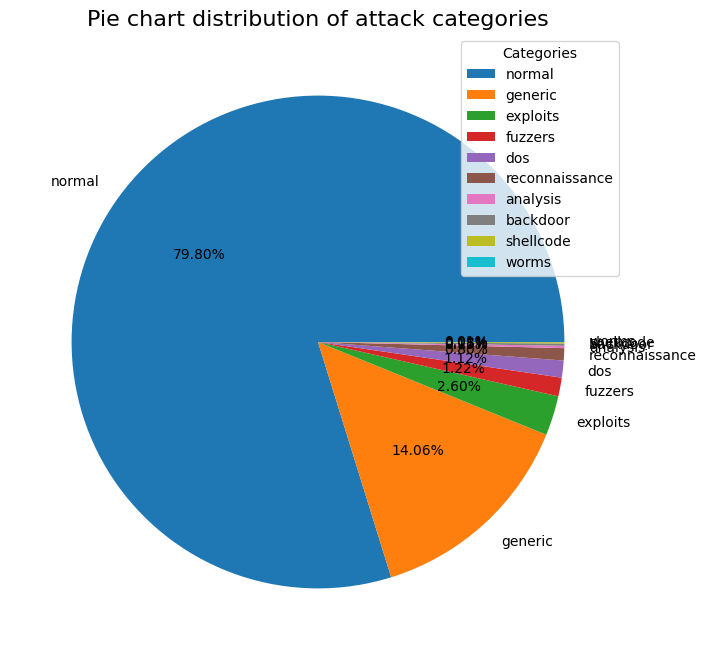

In [10]:
# Creating a pie chart for normal and attack categories
category_counts = train['attack_cat'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%0.2f%%')  # Use the index of the counts as labels
plt.title("Pie chart distribution of attack categories", fontsize=16)
plt.legend(title="Categories", loc="best")
plt.show()

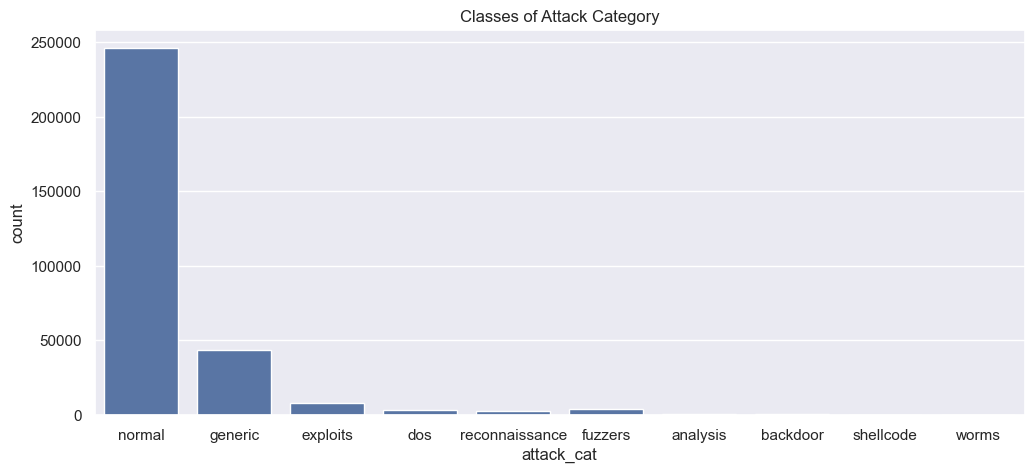

245804 observations of normal (0.8%)
43315 observations of generic (0.14%)
8007 observations of exploits (0.03%)
3435 observations of dos (0.01%)
2471 observations of reconnaissance (0.01%)
3773 observations of fuzzers (0.01%)
469 observations of analysis (0.0%)
466 observations of backdoor (0.0%)
260 observations of shellcode (0.0%)
30 observations of worms (0.0%)


In [11]:
# Count plot for attack_cat
plot_count_plot(train["attack_cat"], 'Classes of Attack Category',(12,5))

## Categorical Variables

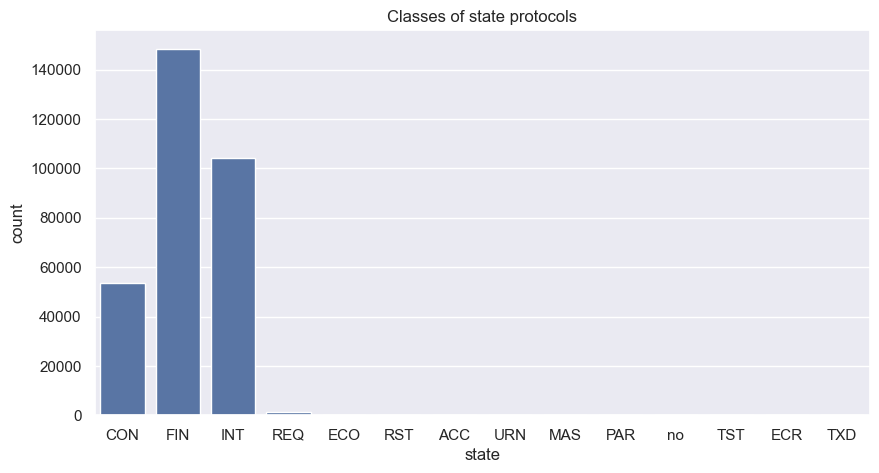

53604 observations of CON (0.17%)
148525 observations of FIN (0.48%)
104320 observations of INT (0.34%)
1423 observations of REQ (0.0%)
74 observations of ECO (0.0%)
66 observations of RST (0.0%)
1 observations of ACC (0.0%)
2 observations of URN (0.0%)
1 observations of MAS (0.0%)
5 observations of PAR (0.0%)
2 observations of no (0.0%)
3 observations of TST (0.0%)
3 observations of ECR (0.0%)
1 observations of TXD (0.0%)


In [12]:
# Count plot for state protocols
plot_count_plot(train['state'], 'Classes of state protocols',(10,5))

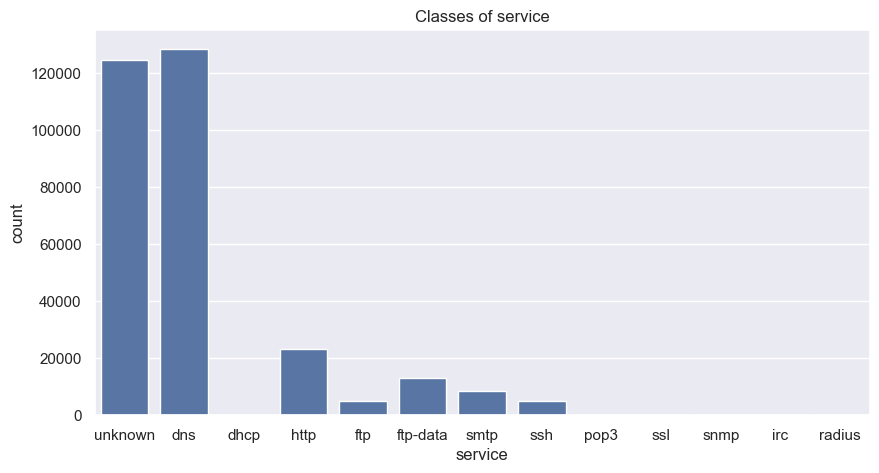

124646 observations of unknown (0.4%)
128548 observations of dns (0.42%)
33 observations of dhcp (0.0%)
23276 observations of http (0.08%)
4934 observations of ftp (0.02%)
12896 observations of ftp-data (0.04%)
8581 observations of smtp (0.03%)
4825 observations of ssh (0.02%)
241 observations of pop3 (0.0%)
21 observations of ssl (0.0%)
17 observations of snmp (0.0%)
6 observations of irc (0.0%)
6 observations of radius (0.0%)


In [13]:
# Count plot for service protocols
plot_count_plot(train['service'], 'Classes of service',(10,5))

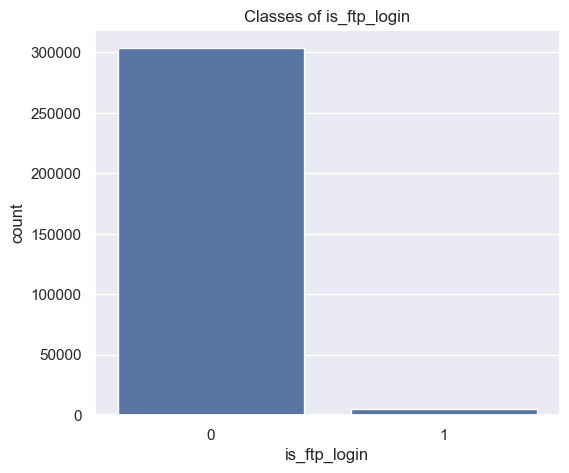

303345 observations of 0 (0.98%)
4685 observations of 1 (0.02%)


In [14]:
# Count plot for is_ftp_login
plot_count_plot(train['is_ftp_login'], 'Classes of is_ftp_login')

In [15]:
print(train[train['is_ftp_login']==0]['attack_cat'].value_counts())
print(train[train['is_ftp_login']==1]['attack_cat'].value_counts())

attack_cat
normal            241497
generic            43315
exploits            7665
fuzzers             3741
dos                 3431
reconnaissance      2471
analysis             469
backdoor             466
shellcode            260
worms                 30
Name: count, dtype: int64
attack_cat
normal      4307
exploits     342
fuzzers       32
dos            4
Name: count, dtype: int64


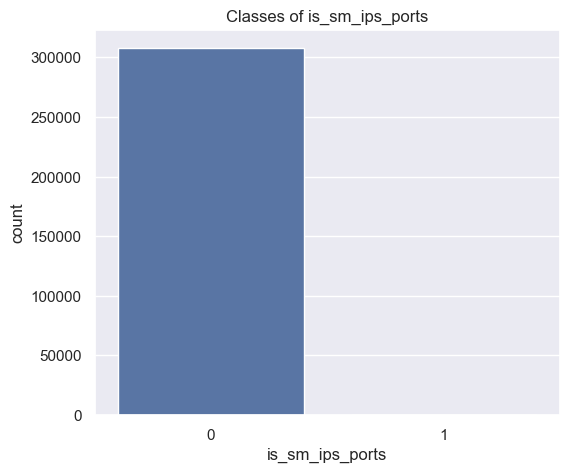

307718 observations of 0 (1.0%)
312 observations of 1 (0.0%)


In [16]:
# Count plot for is_sm_ips_ports
plot_count_plot(train['is_sm_ips_ports'], 'Classes of is_sm_ips_ports')

In [17]:
print(train[train['is_sm_ips_ports']==0]['attack_cat'].value_counts())
print(train[train['is_sm_ips_ports']==1]['attack_cat'].value_counts())

attack_cat
normal            245492
generic            43315
exploits            8007
fuzzers             3773
dos                 3435
reconnaissance      2471
analysis             469
backdoor             466
shellcode            260
worms                 30
Name: count, dtype: int64
attack_cat
normal    312
Name: count, dtype: int64


### Observation
- is_sm_ips_ports is an extremely imbalanced
- only 265 values are observed when is_sm_ips_ports = 1 and all associated with Normal traffic. 
- 36899 observations when is_sm_ips_ports = 0 also associated with Normal traffic
- Both levels of this variable largely indicate Normal Traffic, it's unlikely to help a model differentiate between 'Normal' and various types of 'Attack' traffic
- Variable should be dropped

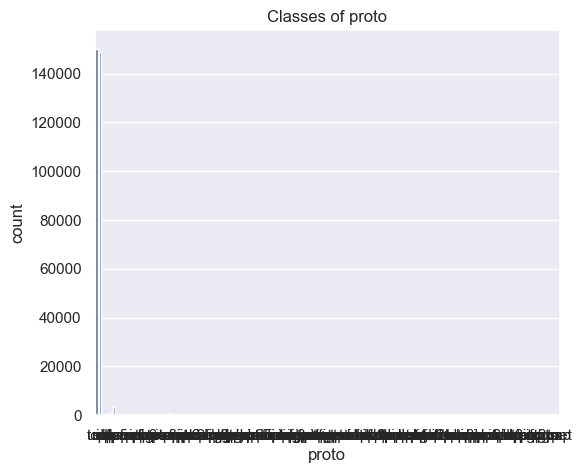

150248 observations of tcp (0.49%)
148617 observations of udp (0.48%)
28 observations of rdp (0.0%)
298 observations of sctp (0.0%)
1047 observations of ospf (0.0%)
3284 observations of unas (0.01%)
28 observations of tlsp (0.0%)
22 observations of larp (0.0%)
91 observations of icmp (0.0%)
34 observations of idpr-cmtp (0.0%)
31 observations of ipcomp (0.0%)
25 observations of iatp (0.0%)
28 observations of qnx (0.0%)
28 observations of i-nlsp (0.0%)
28 observations of zero (0.0%)
28 observations of fire (0.0%)
28 observations of mfe-nsp (0.0%)
69 observations of gre (0.0%)
26 observations of crtp (0.0%)
32 observations of ipv6-route (0.0%)
30 observations of sprite-rpc (0.0%)
777 observations of arp (0.0%)
27 observations of cftp (0.0%)
30 observations of smp (0.0%)
24 observations of vmtp (0.0%)
29 observations of ip (0.0%)
30 observations of vines (0.0%)
52 observations of ipv6 (0.0%)
46 observations of sep (0.0%)
27 observations of iso-ip (0.0%)
26 observations of ipv6-frag (0.0%)


In [18]:
# Count plot for proto
plot_count_plot(train['proto'], 'Classes of proto')

## Numeric Variables
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']

In [19]:
train_numeric.min()

dur                 0.000000e+00
sbytes              0.000000e+00
dbytes              0.000000e+00
sttl                0.000000e+00
dttl                0.000000e+00
sloss               0.000000e+00
dloss               0.000000e+00
sload               0.000000e+00
dload               0.000000e+00
spkts               0.000000e+00
dpkts               0.000000e+00
swin                0.000000e+00
dwin                0.000000e+00
stcpb               0.000000e+00
dtcpb               0.000000e+00
smeansz             0.000000e+00
dmeansz             0.000000e+00
trans_depth         0.000000e+00
res_bdy_len         0.000000e+00
sjit                0.000000e+00
djit                0.000000e+00
stime               1.424250e+09
ltime               1.424250e+09
sintpkt             0.000000e+00
dintpkt             0.000000e+00
tcprtt              0.000000e+00
synack              0.000000e+00
ackdat              0.000000e+00
is_sm_ips_ports     0.000000e+00
ct_state_ttl        0.000000e+00
ct_flw_htt

There are zero value but no negative values so a log1p is sufficient

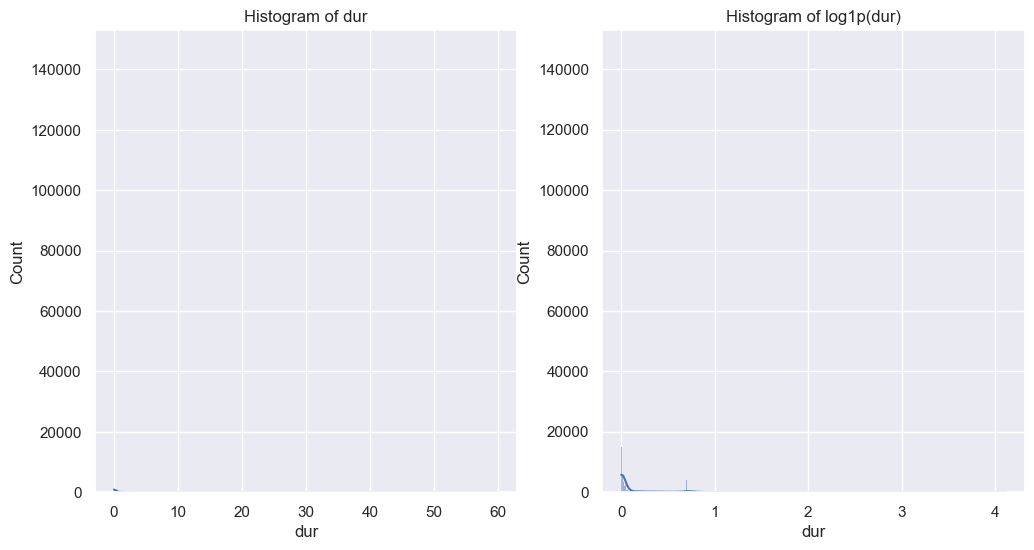

In [20]:
#Plotting the pdf and cdf of duration feature
plot_histograms(train['dur'])

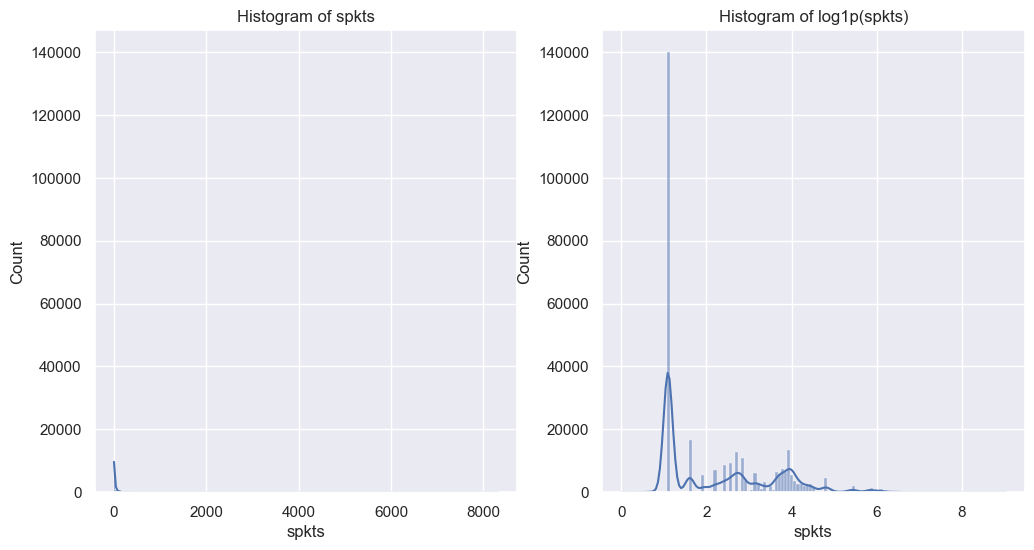

In [21]:
#Plotting the pdf and cdf of spkts feature
plot_histograms(train['spkts'])

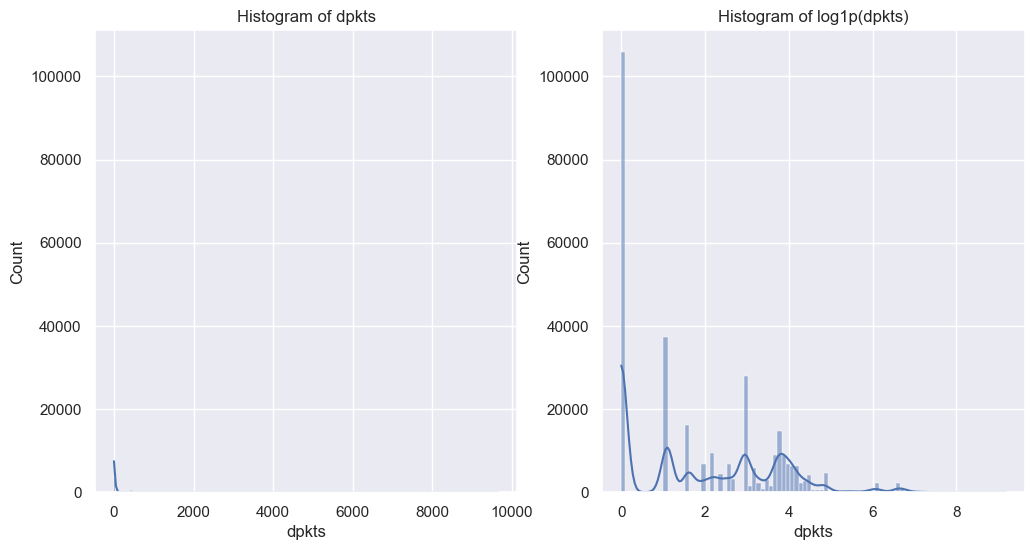

In [22]:
#Plotting the pdf and cdf of dpkts feature
plot_histograms(train['dpkts'])

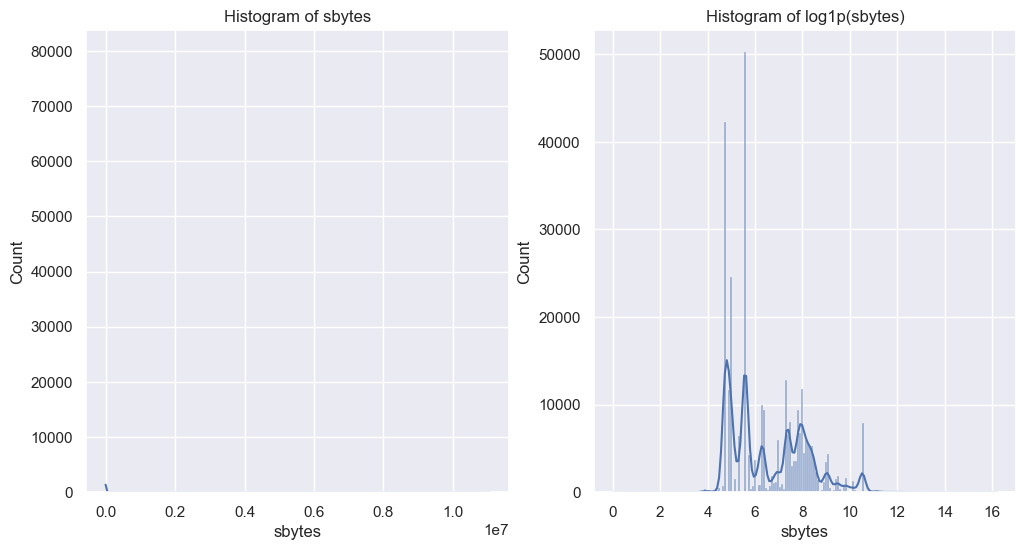

In [23]:
#Plotting the pdf and cdf of sbytes feature
plot_histograms(train['sbytes'])

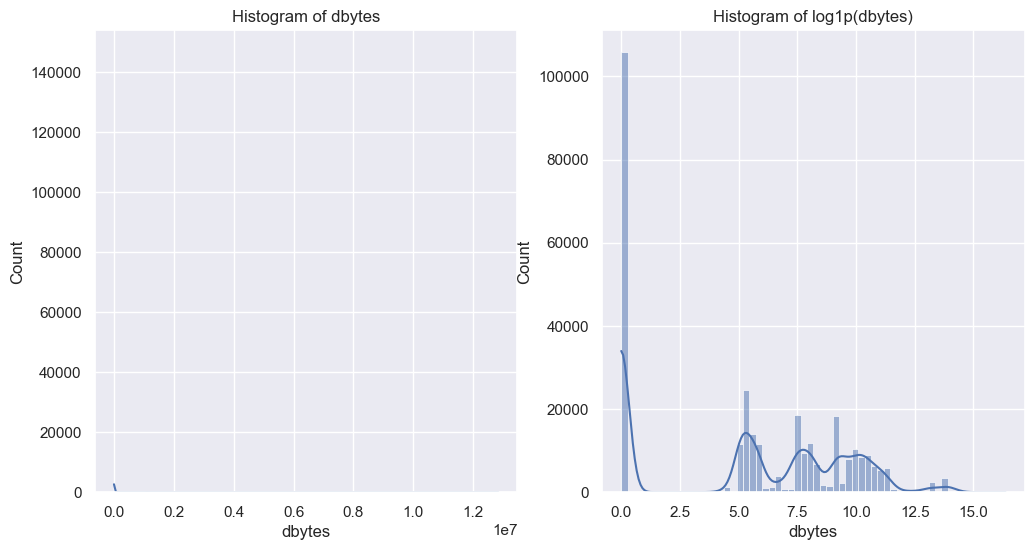

In [24]:
#Plotting the pdf and cdf of dbytes feature
plot_histograms(train['dbytes'])

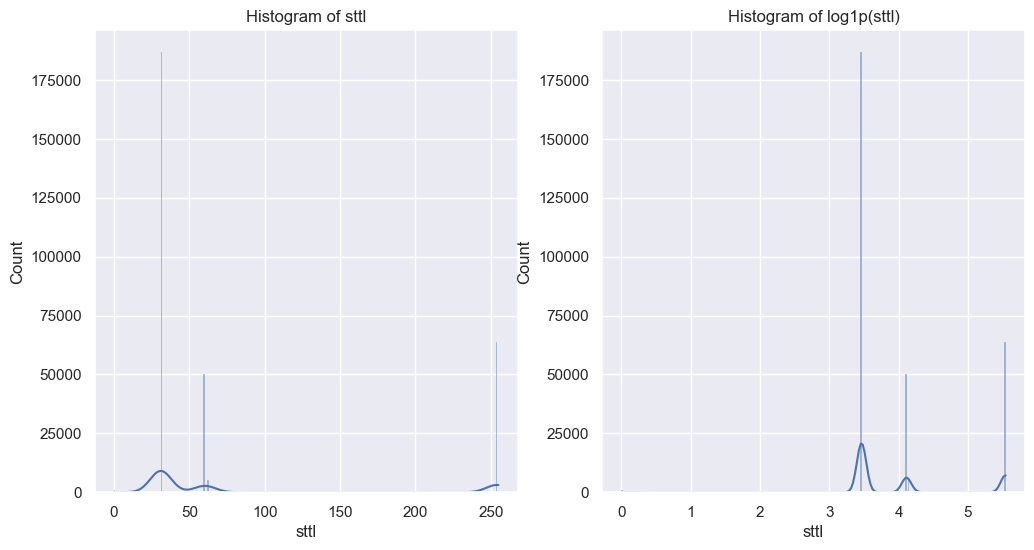

In [25]:
#Plotting the pdf and cdf of sttl feature
plot_histograms(train['sttl'])

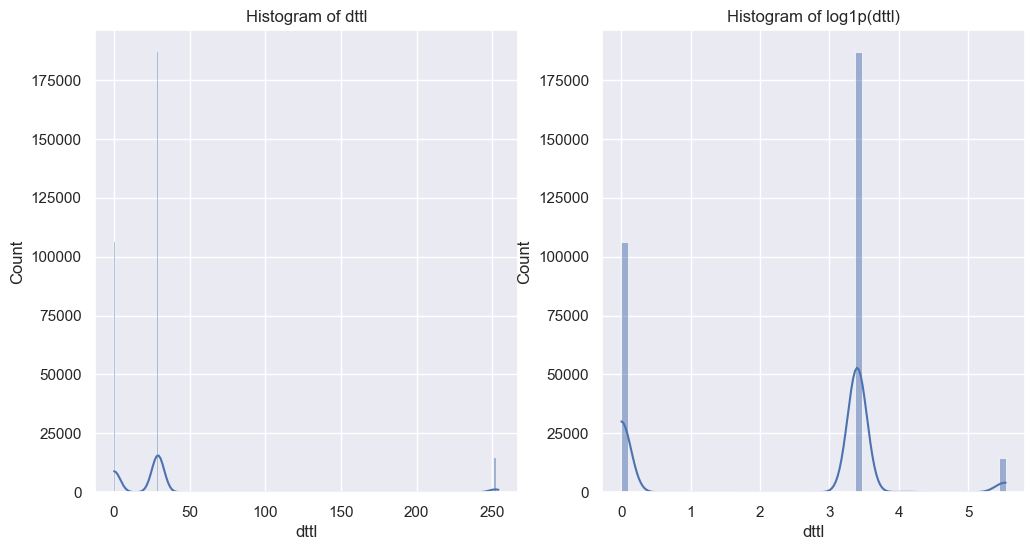

In [26]:
#Plotting the pdf and cdf of dttl feature
plot_histograms(train['dttl'])

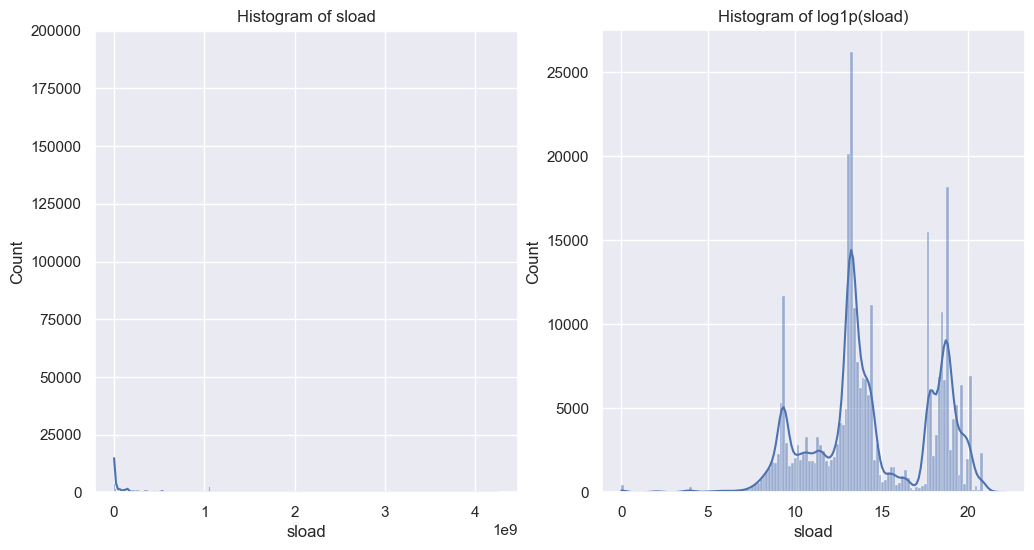

In [27]:
#Plotting the pdf and cdf of sload feature
plot_histograms(train['sload'])

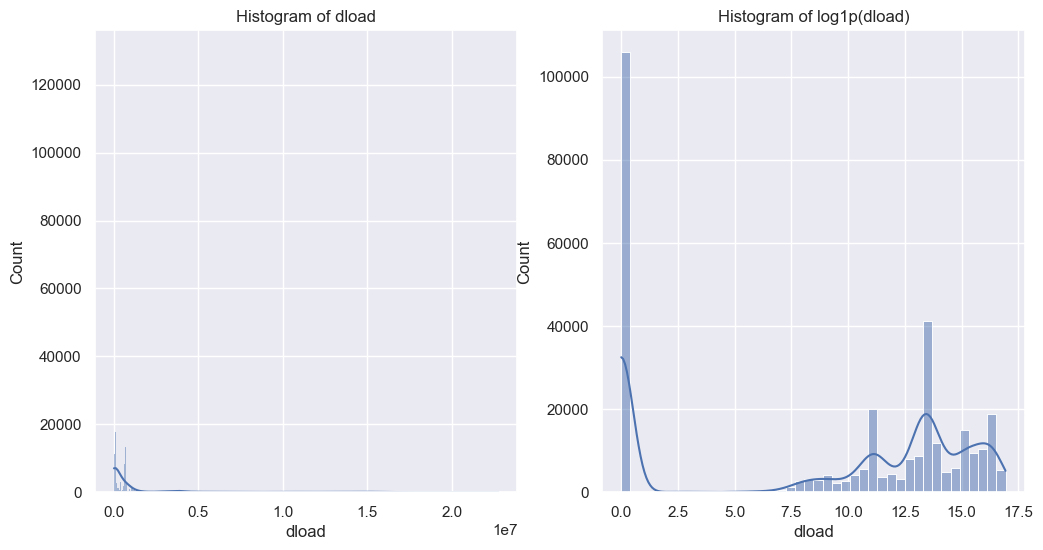

In [28]:
#Plotting the pdf and cdf of dload feature
plot_histograms(train['dload'])

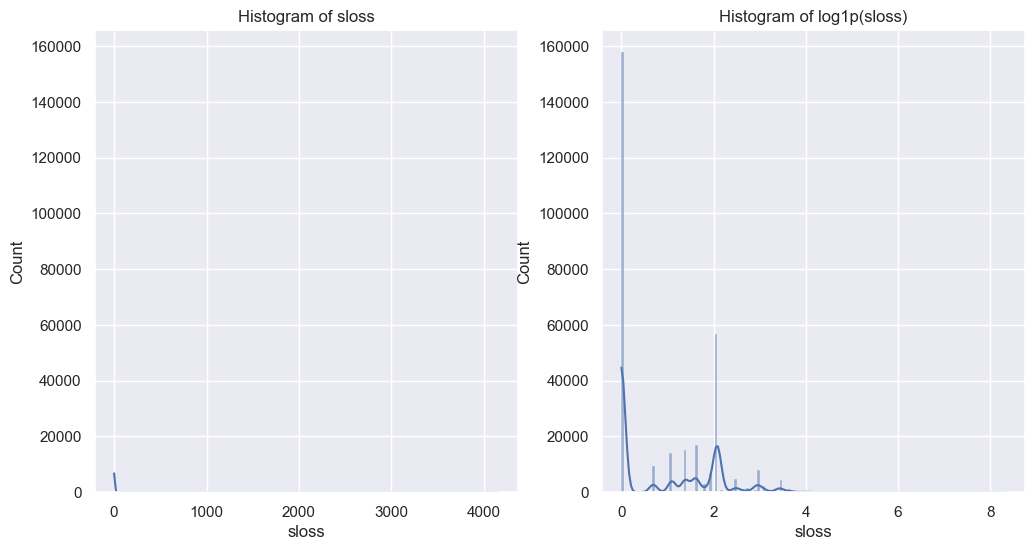

In [29]:
#Plotting the pdf and cdf of sloss feature
plot_histograms(train['sloss'])

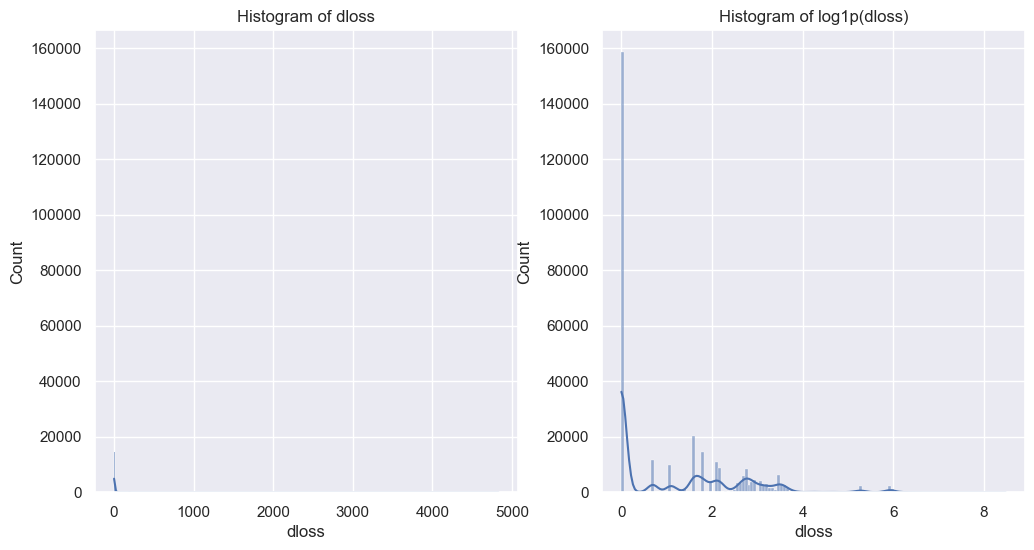

In [30]:
#Plotting the pdf and cdf of dloss feature
plot_histograms(train['dloss'])

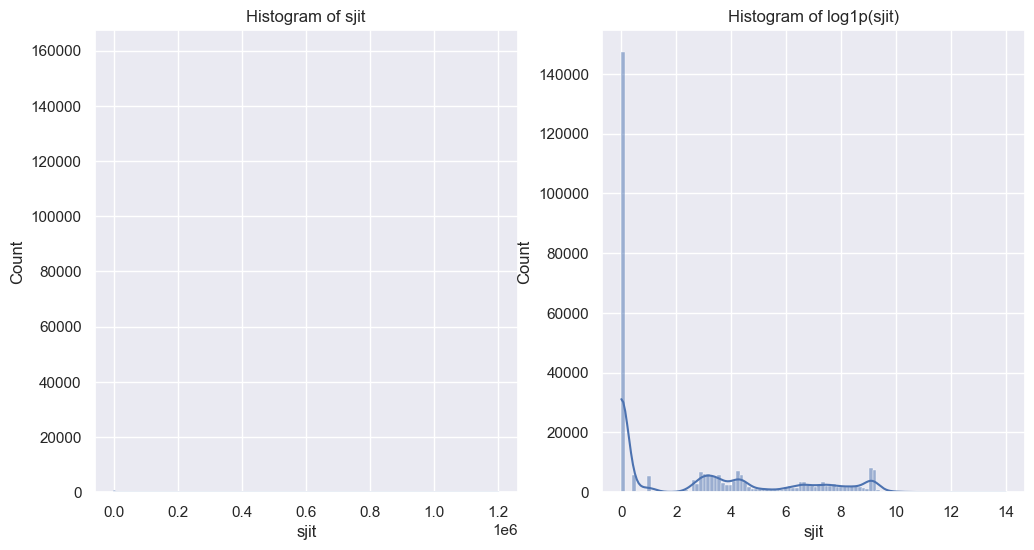

In [31]:
#Plotting the pdf and cdf of sjit feature
plot_histograms(train['sjit'])

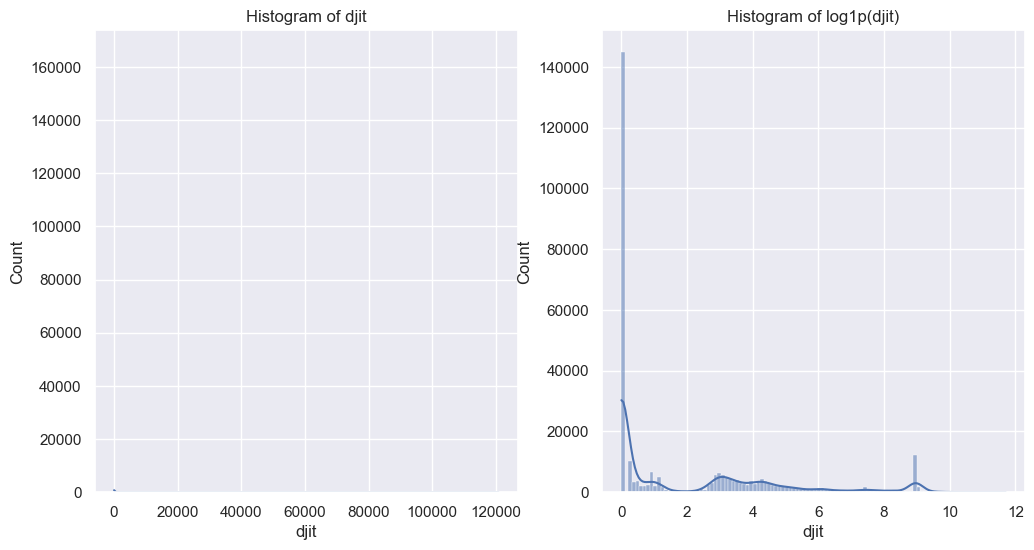

In [32]:
#Plotting the pdf and cdf of djit feature
plot_histograms(train['djit'])

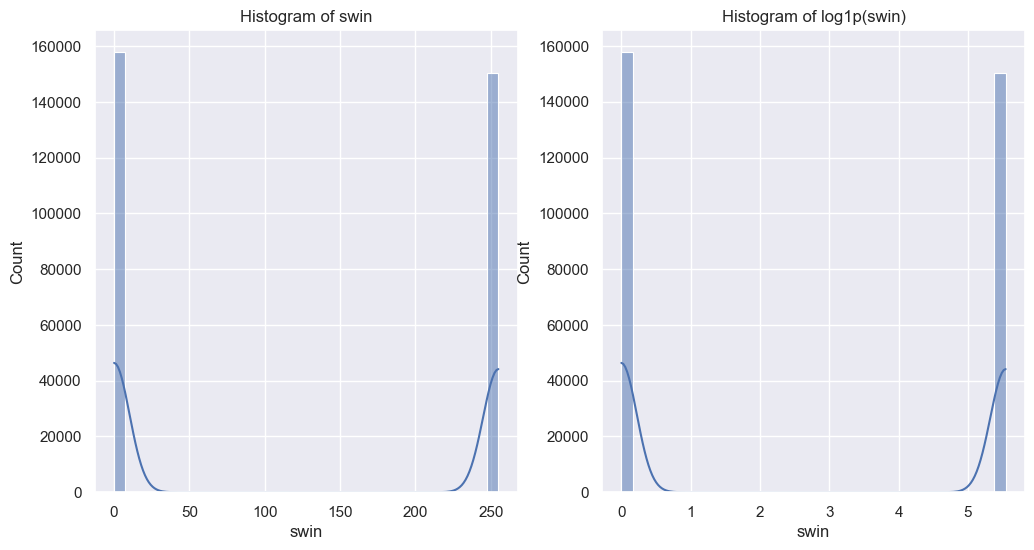

In [33]:
#Plotting the pdf and cdf of swin feature
plot_histograms(train['swin'])

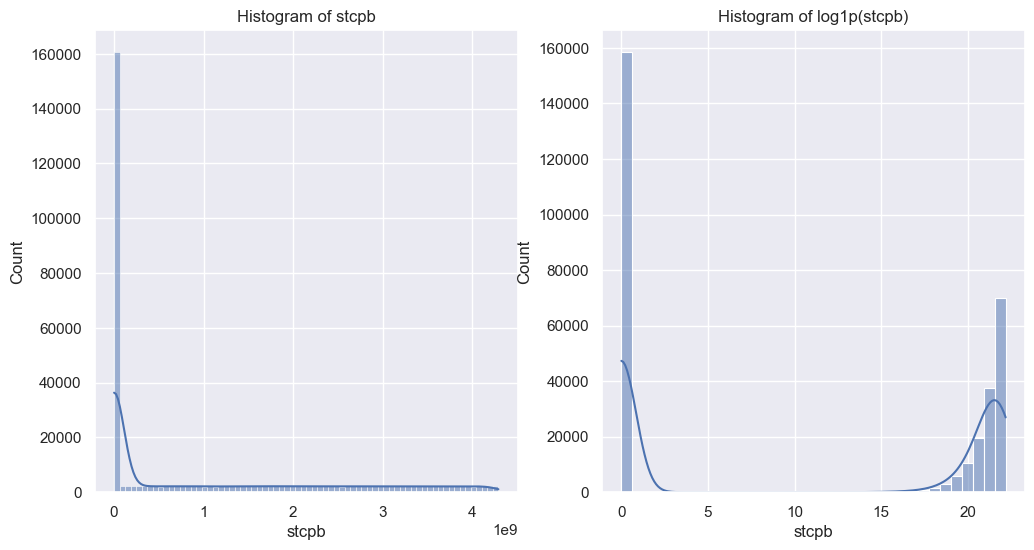

In [34]:
#Plotting the pdf and cdf of stcpb feature
plot_histograms(train['stcpb'])

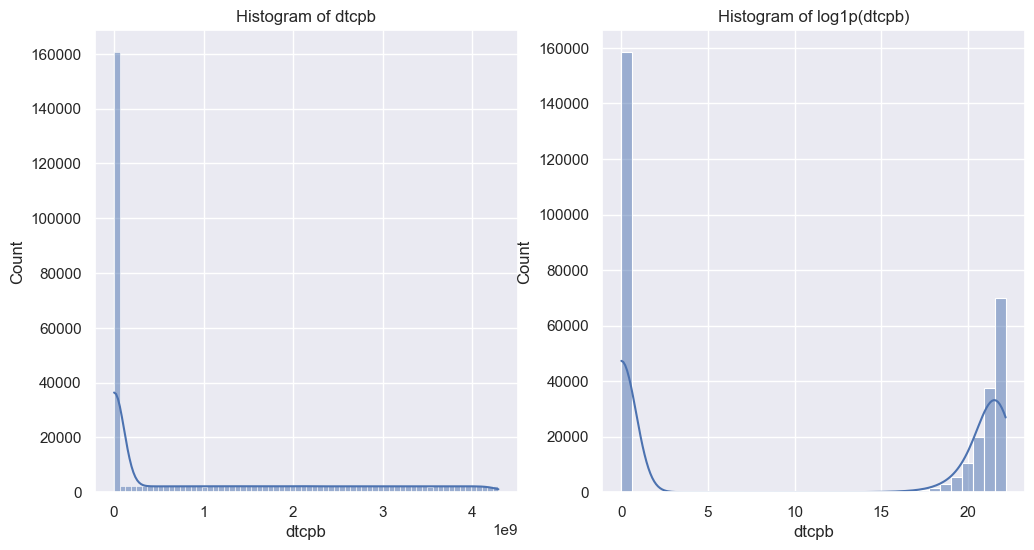

In [35]:
#Plotting the pdf and cdf of dtcpb feature
plot_histograms(train['dtcpb'])

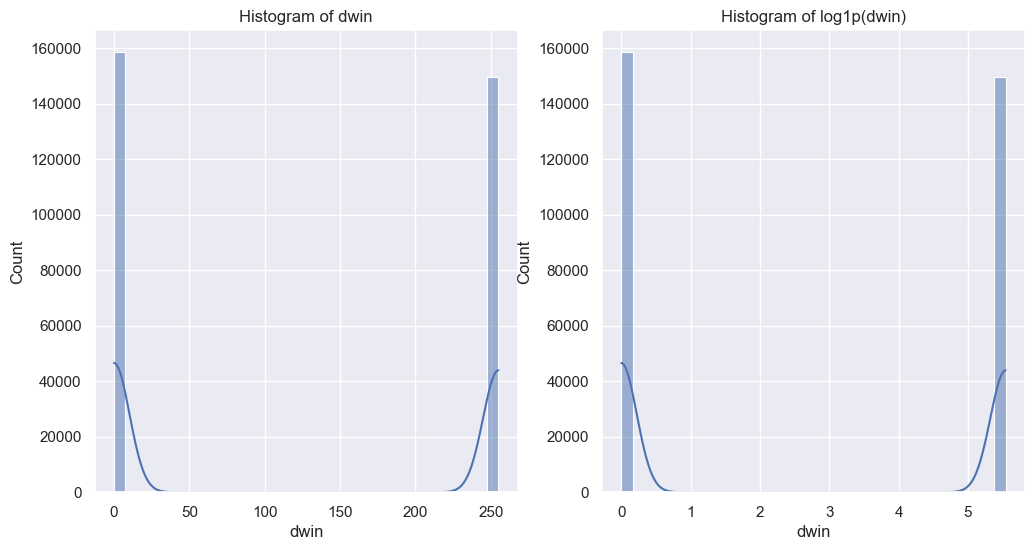

In [36]:
#Plotting the pdf and cdf of dwin feature
plot_histograms(train['dwin'])

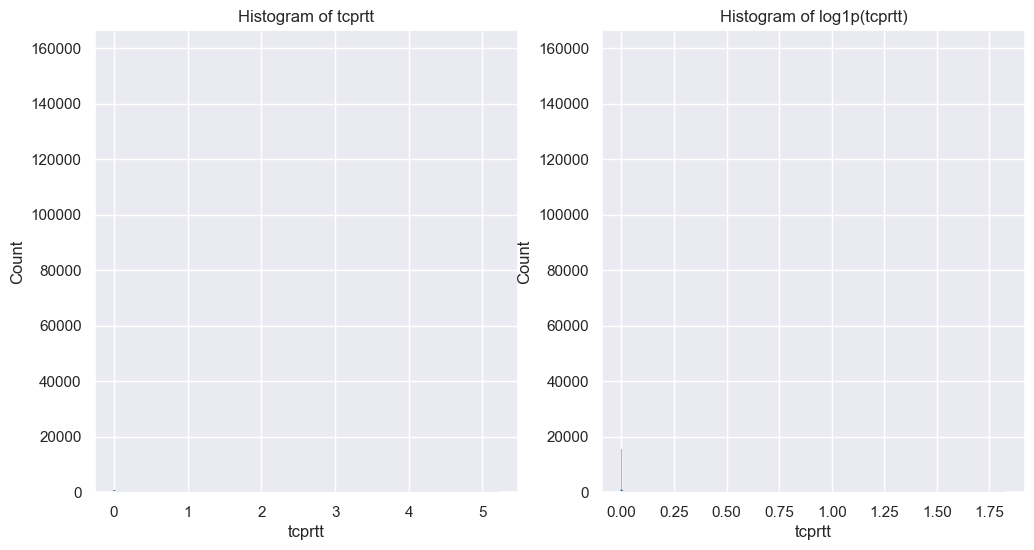

In [37]:
#Plotting the pdf and cdf of tcprtt feature
plot_histograms(train['tcprtt'])

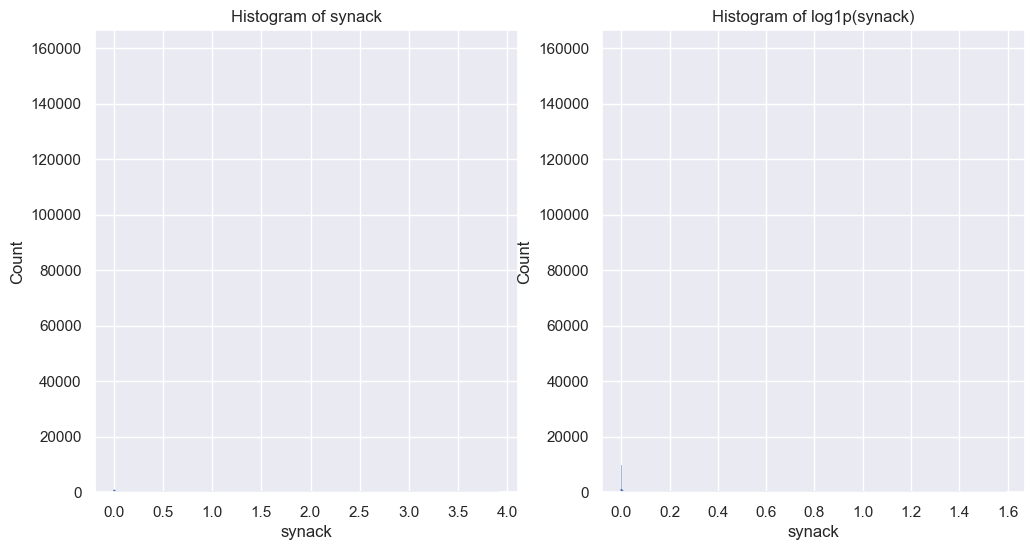

In [38]:
#Plotting the pdf and cdf of synack feature
plot_histograms(train['synack'])

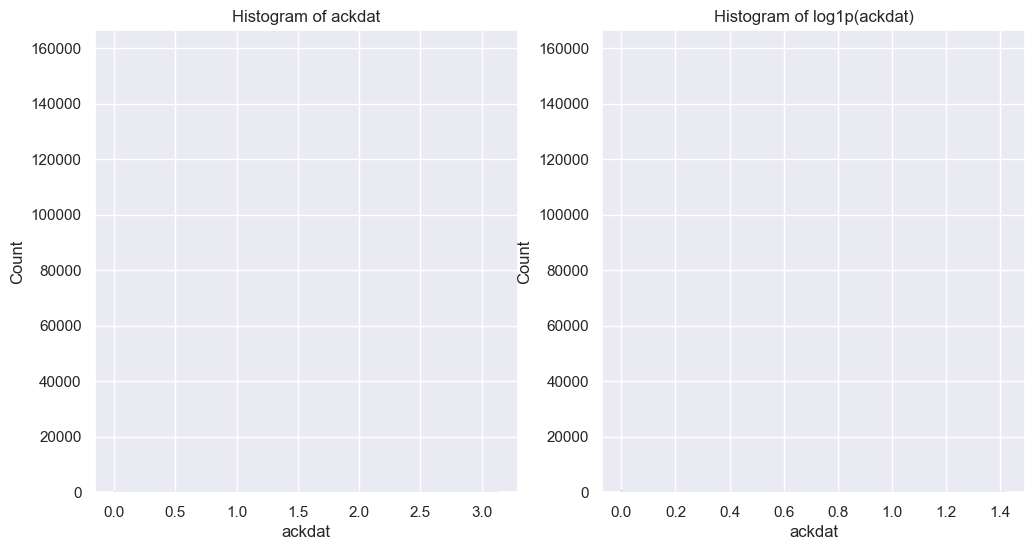

In [39]:
#Plotting the pdf and cdf of ackdat feature
plot_histograms(train['ackdat'])

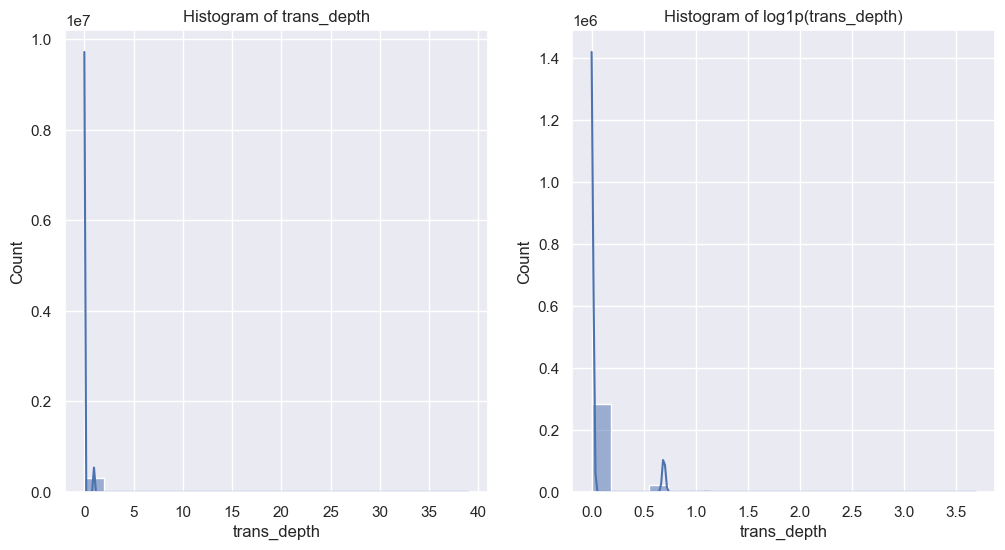

In [40]:
#Plotting the pdf and cdf of trans_depth feature
plot_histograms(train['trans_depth'])

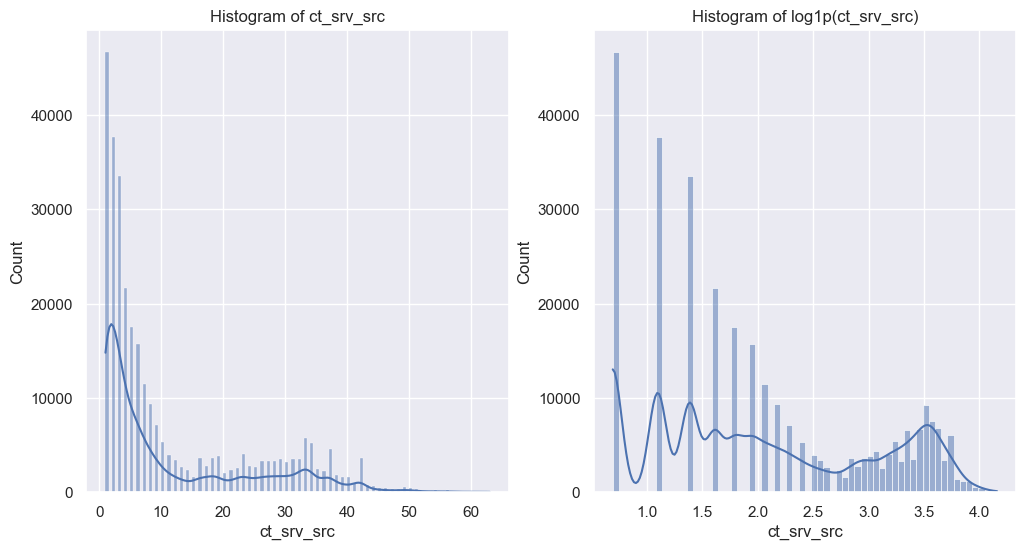

In [41]:
#Plotting the pdf and cdf of ct_srv_src feature
plot_histograms(train['ct_srv_src'])

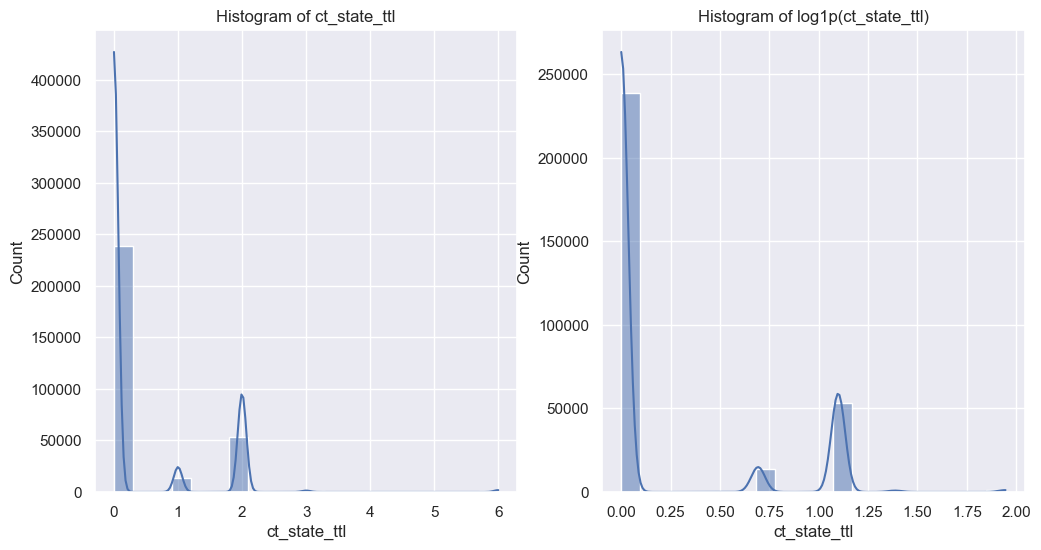

In [42]:
#Plotting the pdf and cdf of ct_state_ttl feature
plot_histograms(train['ct_state_ttl'])

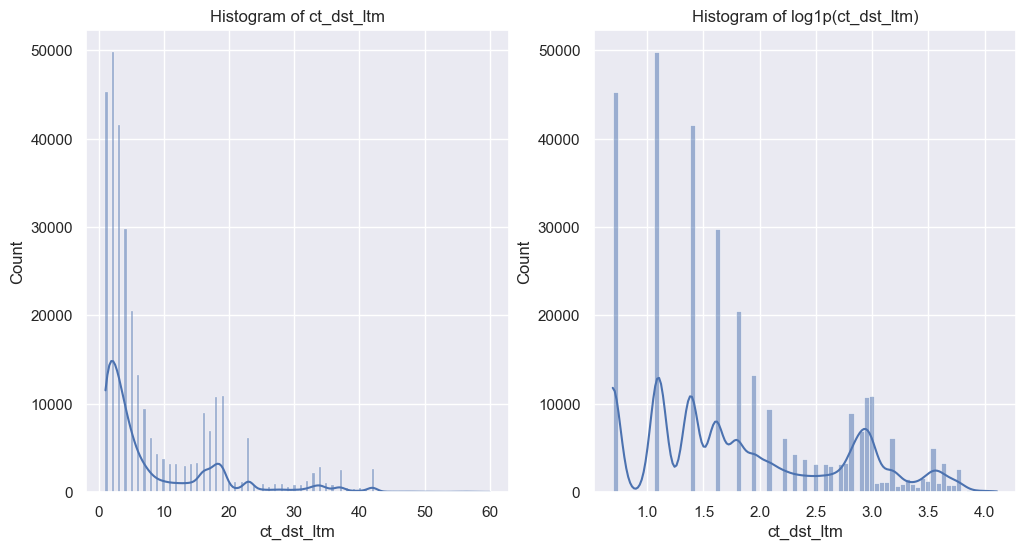

In [43]:
#Plotting the pdf and cdf of ct_dst_ltm feature
plot_histograms(train['ct_dst_ltm'])

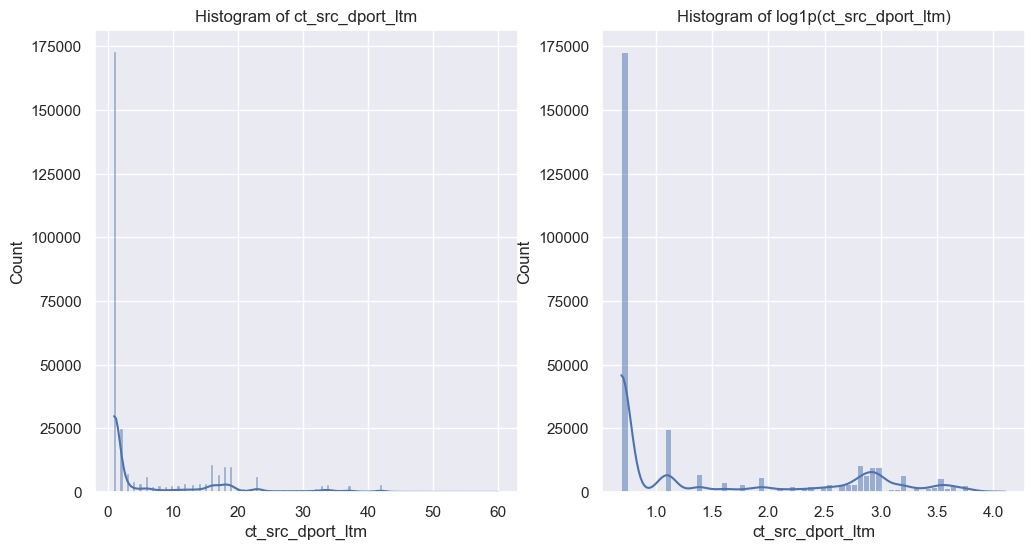

In [44]:
#Plotting the pdf and cdf of ct_src_dport_ltm feature
plot_histograms(train['ct_src_dport_ltm'])

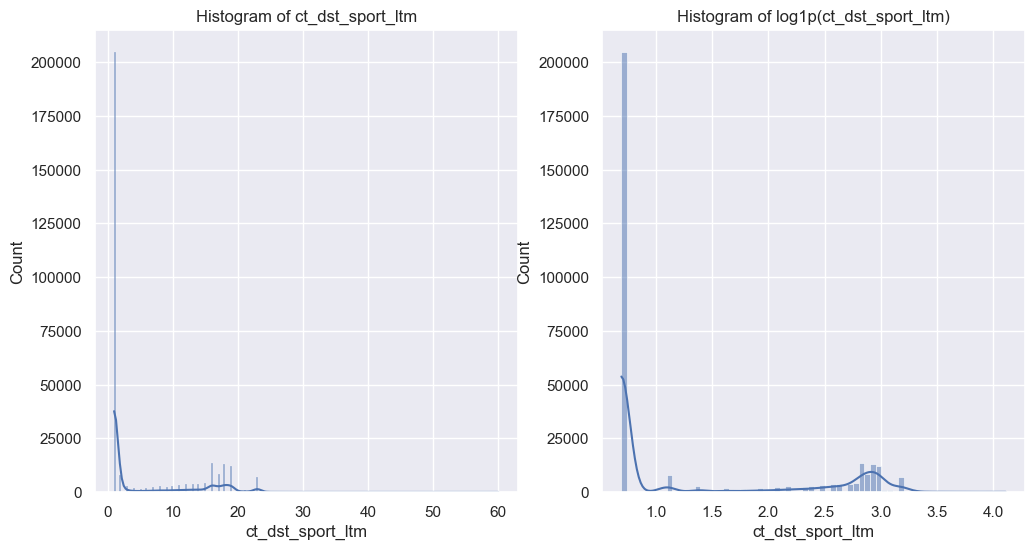

In [45]:
#Plotting the pdf and cdf of ct_src_sport_ltm feature
plot_histograms(train['ct_dst_sport_ltm'])

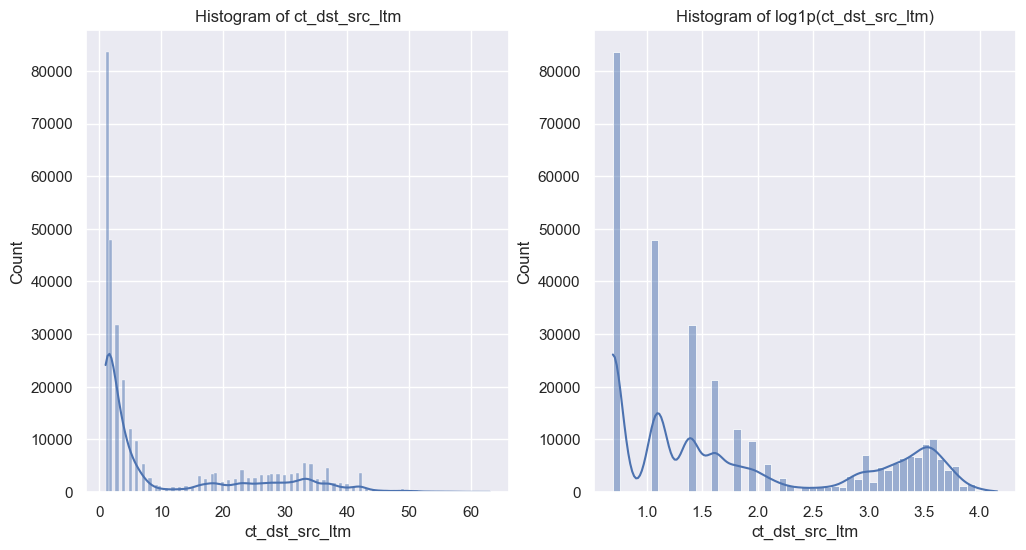

In [46]:
#Plotting the pdf and cdf of ct_dst_src_ltm feature
plot_histograms(train['ct_dst_src_ltm'])

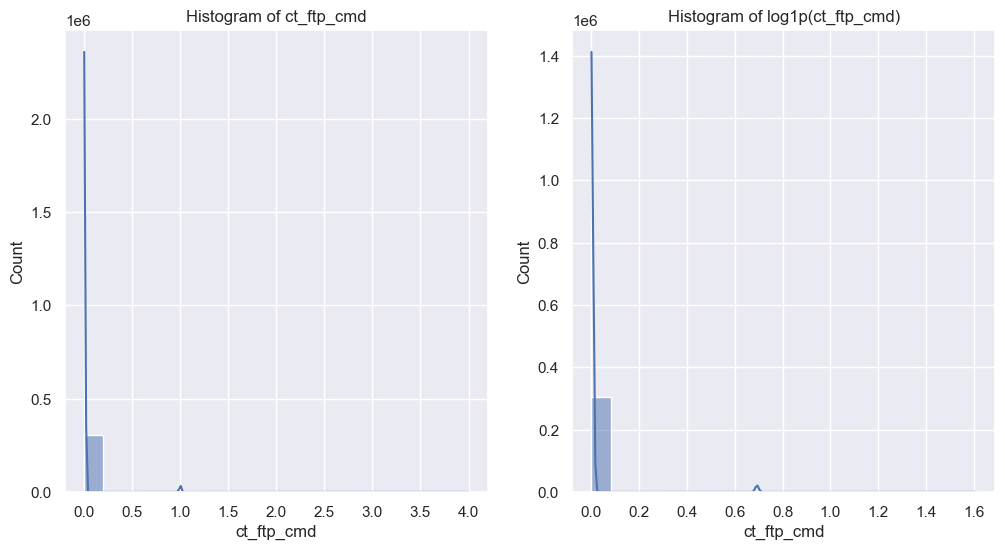

In [47]:
#Plotting the pdf and cdf of ct_ftp_cmd feature
plot_histograms(train['ct_ftp_cmd'])

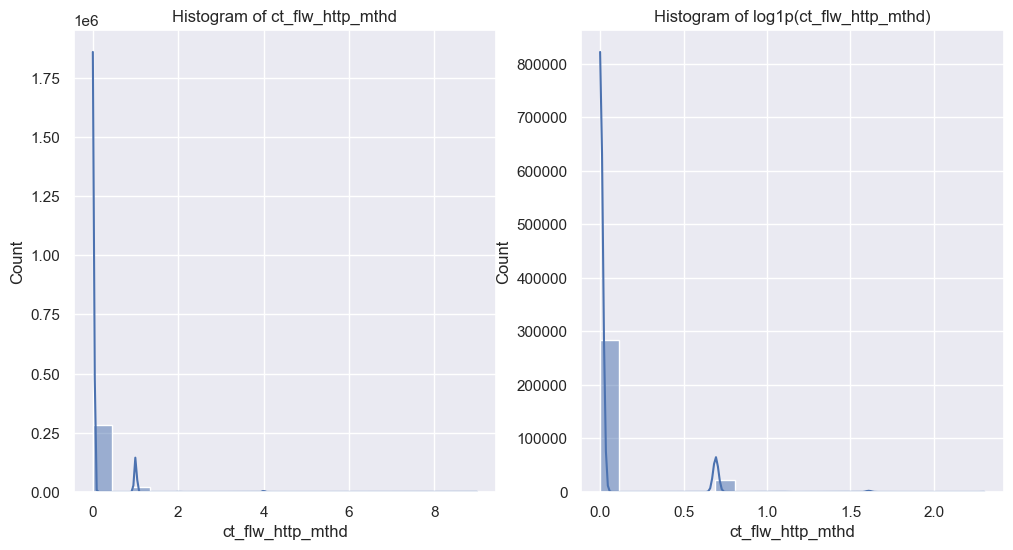

In [48]:
#Plotting the pdf and cdf of ct_flw_http_mthd feature
plot_histograms(train['ct_flw_http_mthd'])

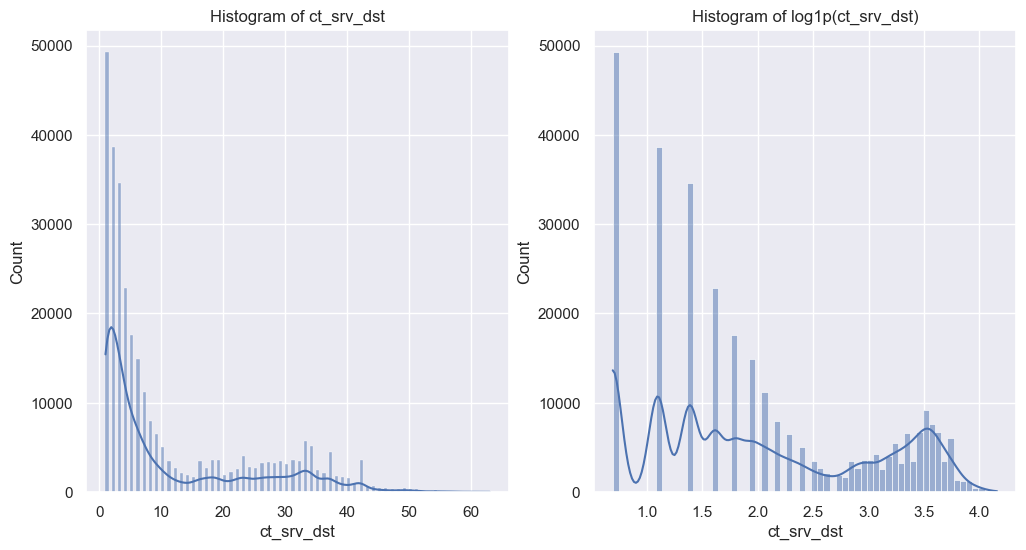

In [49]:
#Plotting the pdf and cdf of ct_srv_dst feature
plot_histograms(train['ct_srv_dst'])